In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import glob

In [41]:
glob.glob(r'D:\data_analysis\time_series_analysis\individual_stocks_5yr\*.csv')

['D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ADP_data.csv',
 'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\ADSK_data.csv',
 'D:\\data_analysis\\tim

In [42]:
len(glob.glob(r'D:\data_analysis\time_series_analysis\individual_stocks_5yr\*.csv'))

505

In [43]:
company_list = [
    r'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AMZN_data.csv',
    r'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\GOOG_data.csv',
    r'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\MSFT_data.csv'
]

In [44]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
all_data = pd.DataFrame()

for file in company_list:
    current_data = pd.read_csv(file)
    all_data = current_data.append(all_data, ignore_index=True)
    # all_data = pd.concat([all_data,current_data], ignore_index=True)

In [46]:
all_data.shape

(4752, 7)

In [47]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [48]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

Checking missing value in each row

In [49]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Checking datatypes of each column (feature)

In [50]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [51]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [52]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

Why Changed the data type of date from object to date?

We need to analyse stock price changes over "time". 

Therefore, we need to make sure date has the dtype of datetime.

So we can extract, analyse and visualize data correctly without errors using python libraries.

In [53]:
tech_list = all_data['Name'].unique()

Iterating through the tech_list to plot multi-line plots.

To be able to index the subplots properly, we use index in subplot. The index comes from the company in tech_list. This tech_list is enumerated with the starting index 1 so that each company name is now associated with each index for looping through to plot.

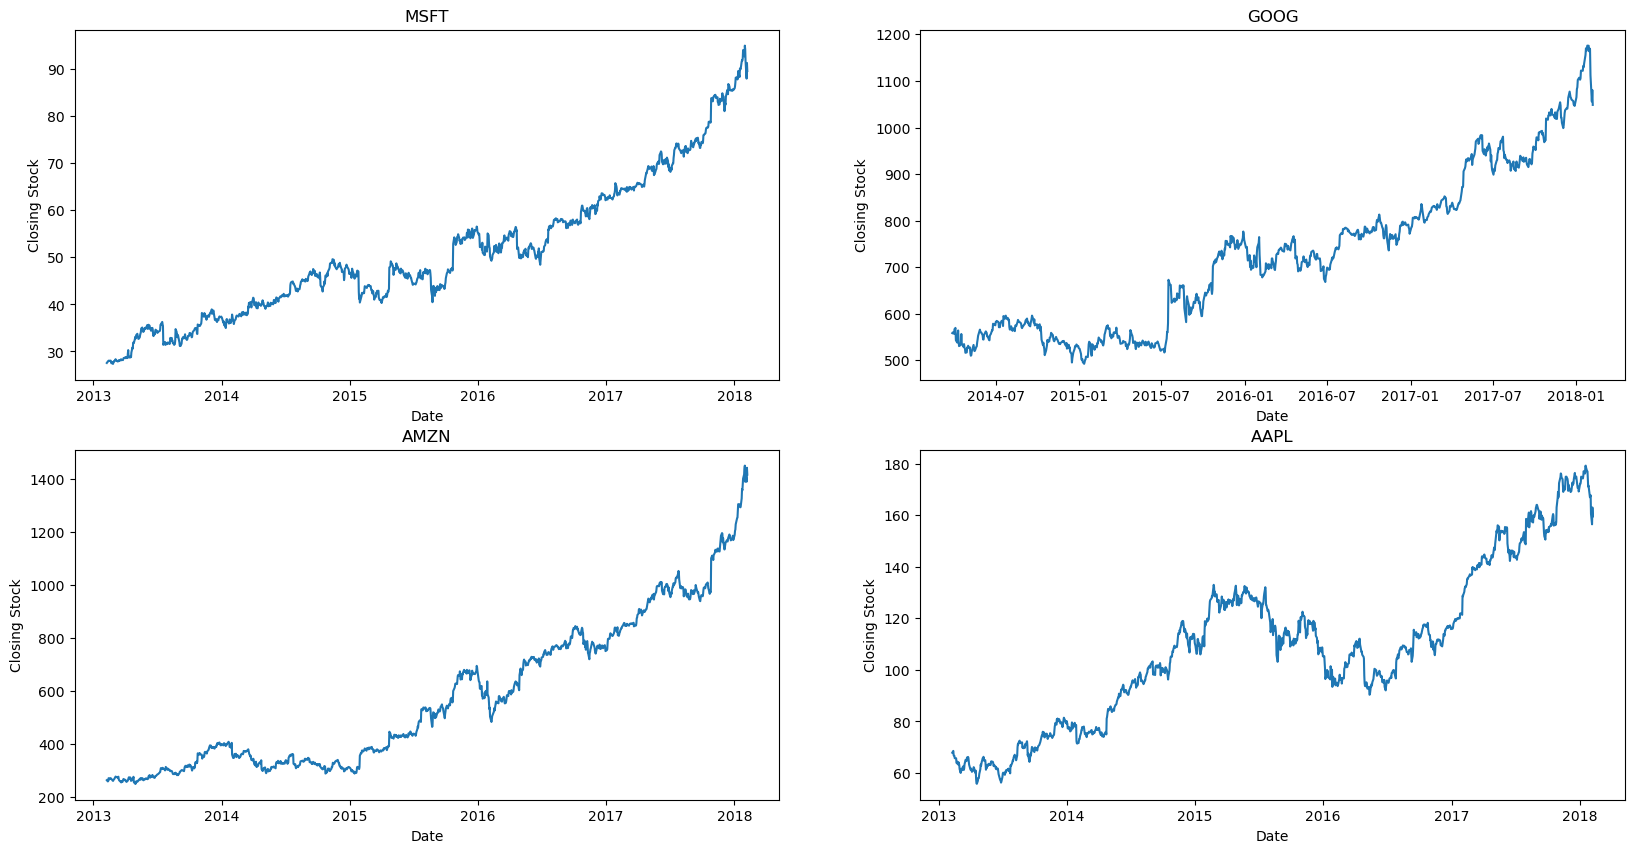

In [54]:
plt.figure(figsize=(20,10))
for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Closing Stock')

Subplot(x,y,index) - We want 2 plots for each row with 2 column meaning there will only be 2 plots per row/column and the index marks each plot that we visualise each time which is why we need to enumerate the string list to extract its indices to loop.

Analysing the moving average of various stocks

Moving Average - A statistical value extremely used in analysing data in stock industry to remove noise in data.

Moving Average value has a parameter called window which in layman's term specifies the number of rows it will compute repeatedly in a given dataframe. This window represents the days. This window value is domain-specific meaning it can be 10 (From 0 to 9, From 1 to 10, From 2 to 11, and so on) or 100, 200 depending on the size of the data and its analysis. For now, we'll stick to 10.

In [55]:
all_data['close'].rolling(window=10).mean().head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
15    27.7615
16    27.7920
17    27.8140
18    27.8790
19    27.9030
Name: close, dtype: float64

From above code, we calculate moving average using rolling function on the closing stock feature with a window of 10 for 'moving' and call mean() on it for average and returns the first 20 rows. It is a given the first 9 rows will give the value NaN since we cannot calculate 10 values for each of those rows for they are not in range. We can adjust it with the following code.

In [56]:
new_data = all_data.copy()

In [57]:
# moving average days
ma_days = [10,20,50]

for ma in ma_days:
    new_data['close_'+str(ma)] = new_data['close'].rolling(window=ma).mean()

new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [58]:
new_data.set_index('date', inplace=True)
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


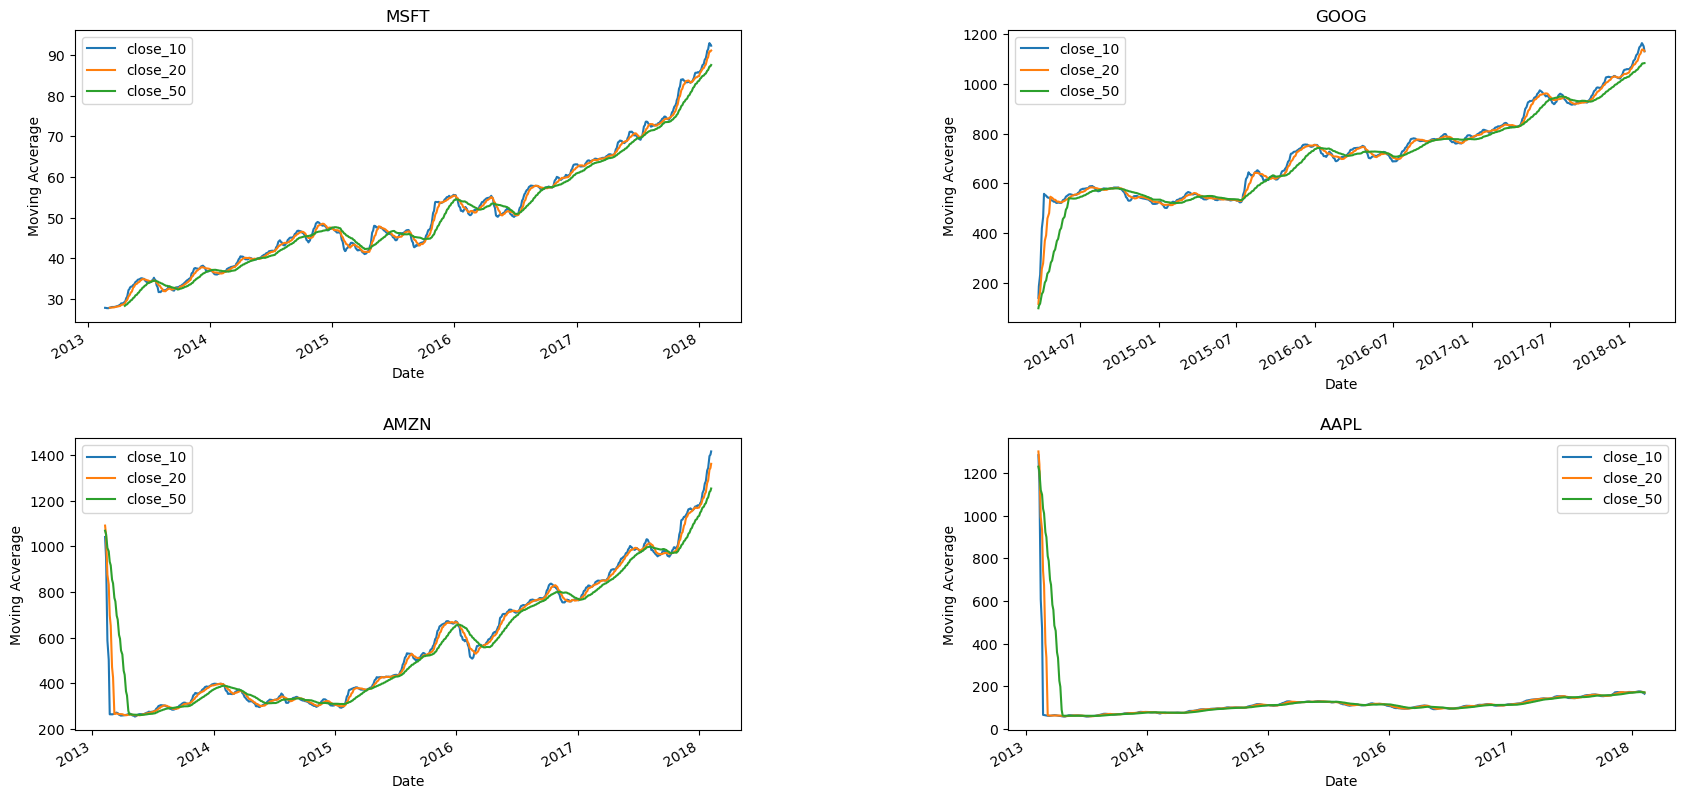

In [59]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Moving Acverage')
    

Analyse the closing price change in Apple Stock

In [60]:
apple = pd.read_csv(r'D:\\data_analysis\\time_series_analysis\\individual_stocks_5yr\\AAPL_data.csv')
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [61]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [62]:
apple['Daily Return (in %)'] = apple['close'].pct_change() * 100
apple['Daily Return (in %)']

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: Daily Return (in %), Length: 1259, dtype: float64

In [63]:
apple.head(5)

,date,open,high,low,close,volume,Name,Daily Return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [64]:
import plotly.express as px

In [65]:
plt.figure(figsize=(20,15))
px.line(apple, x='date', y='Daily Return (in %)')

<Figure size 2000x1500 with 0 Axes>

Doing Resampling Analysis

We can perform resampling analysis on daily ('d'), weekly ('w'), monthly ('M'), quarterly ('Q'), and yearly ('Y')

Before performing resampling,

the dates in the dataframes must be row-indexed. Mandatory for Pandas functionality.

In [66]:
apple.dtypes

date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
Daily Return (in %)    float64
dtype: object

In [67]:
apple['date'] = pd.to_datetime(apple['date'])

In [68]:
apple.set_index('date', inplace=True)

In [69]:
apple

,open,high,low,close,volume,Name,Daily Return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442


In [70]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

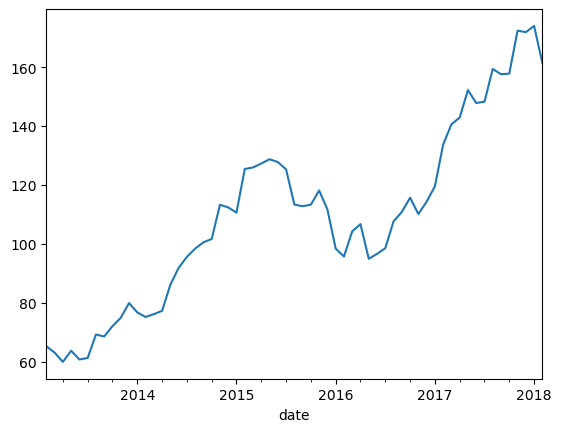

In [72]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

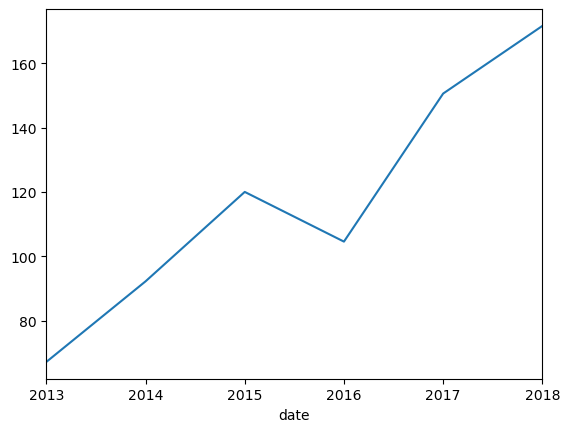

In [74]:
apple['close'].resample('Y').mean().plot()

Multi-variate analysis to understand corelation

Correlation analysis - are closing prices of these tech companies are correlated to each other or not

Scatterplots are common to visualise correlations between asset.

We will perform pair plots - where the diagonal will be histograms and non-diagonals will be scatterplots.

The number of scatterplots come from combination nCr. For instance, 4C2 means from 4 features, we'll select two features each to visualise plots.

Therefore, we'll get 6 plots on each side.

We can get pairplot using pairplot() from various packages.

In [75]:
company_list

['D:\\\\data_analysis\\\\time_series_analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\data_analysis\\\\time_series_analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\data_analysis\\\\time_series_analysis\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\data_analysis\\\\time_series_analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [78]:
appl = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [106]:
closing_prices = pd.DataFrame()

In [107]:
closing_prices['apple_close'] = appl['close']
closing_prices['amzn_close'] = amzn['close']
closing_prices['goog_close'] = goog['close']
closing_prices['msft_close'] = msft['close']

In [108]:
closing_prices

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


<Figure size 2000x1000 with 0 Axes>

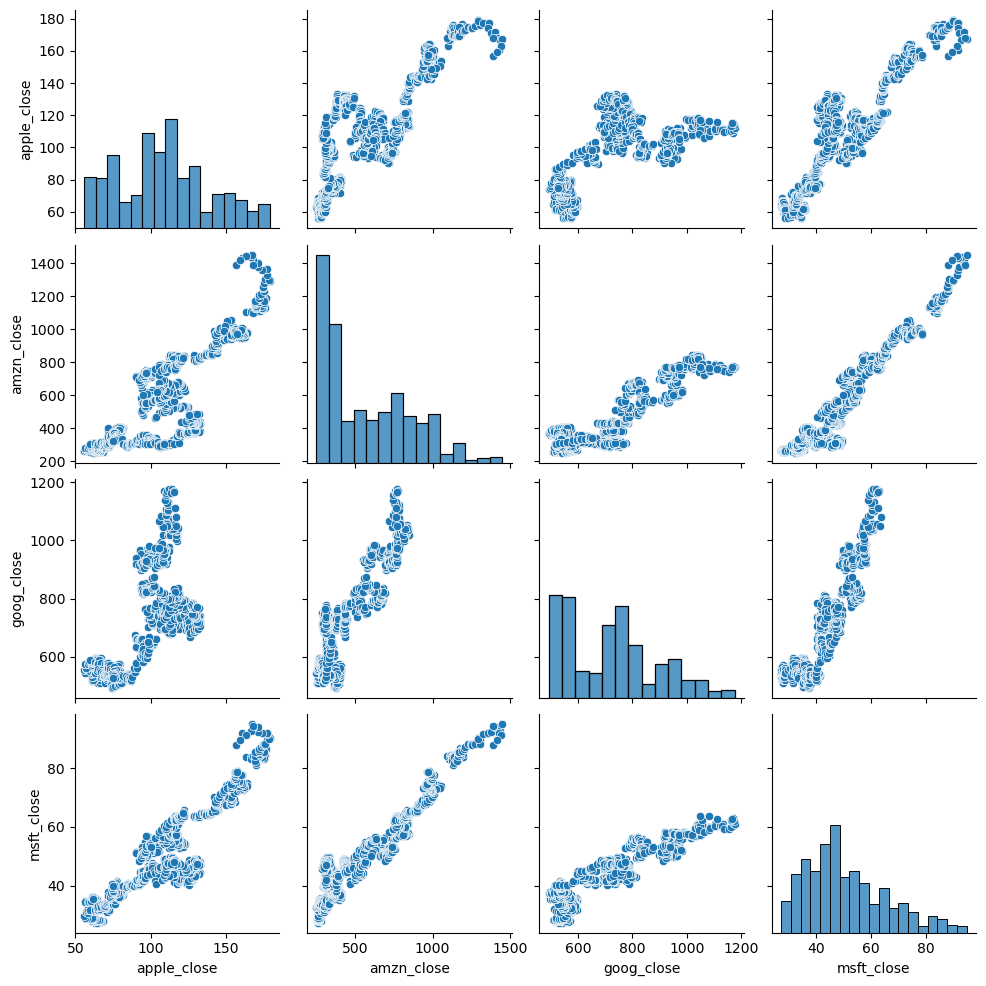

In [109]:
plt.figure(figsize=(20,10))
sns.pairplot(closing_prices)

In [110]:
closing_prices.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

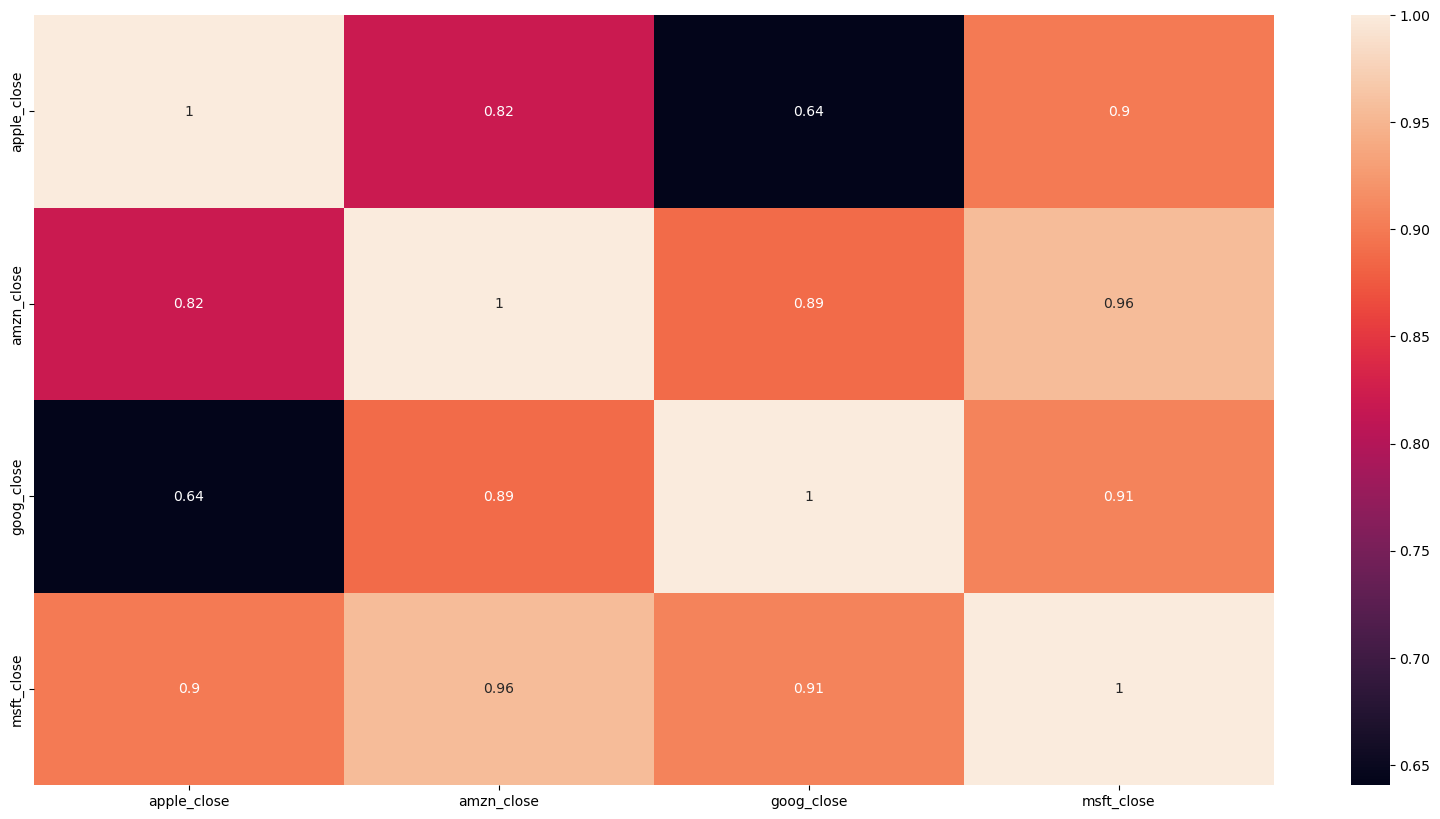

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(closing_prices.corr(), annot=True)

Correlation analysis using pairgrid

We need percentage data ready.

In [112]:
closing_prices['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

The above closing prices from Apple has a decrease of approximately -1 from row 0 to 1 then around -2.5 from 1 to 2 and we want to present that data with more readability.

In [113]:
closing_prices['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [114]:
((closing_prices['apple_close'] - closing_prices['apple_close'].shift(1)) / closing_prices['apple_close'].shift(1)) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [115]:
for col in closing_prices.columns:
   closing_prices[col+'_pct_change'] = ((closing_prices[col] - closing_prices[col].shift(1)) / closing_prices[col].shift(1)) * 100

In [116]:
closing_prices

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [117]:
closing_prices.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [118]:
closing_pct = closing_prices[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [119]:
closing_pct

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


PairGrid object initialization

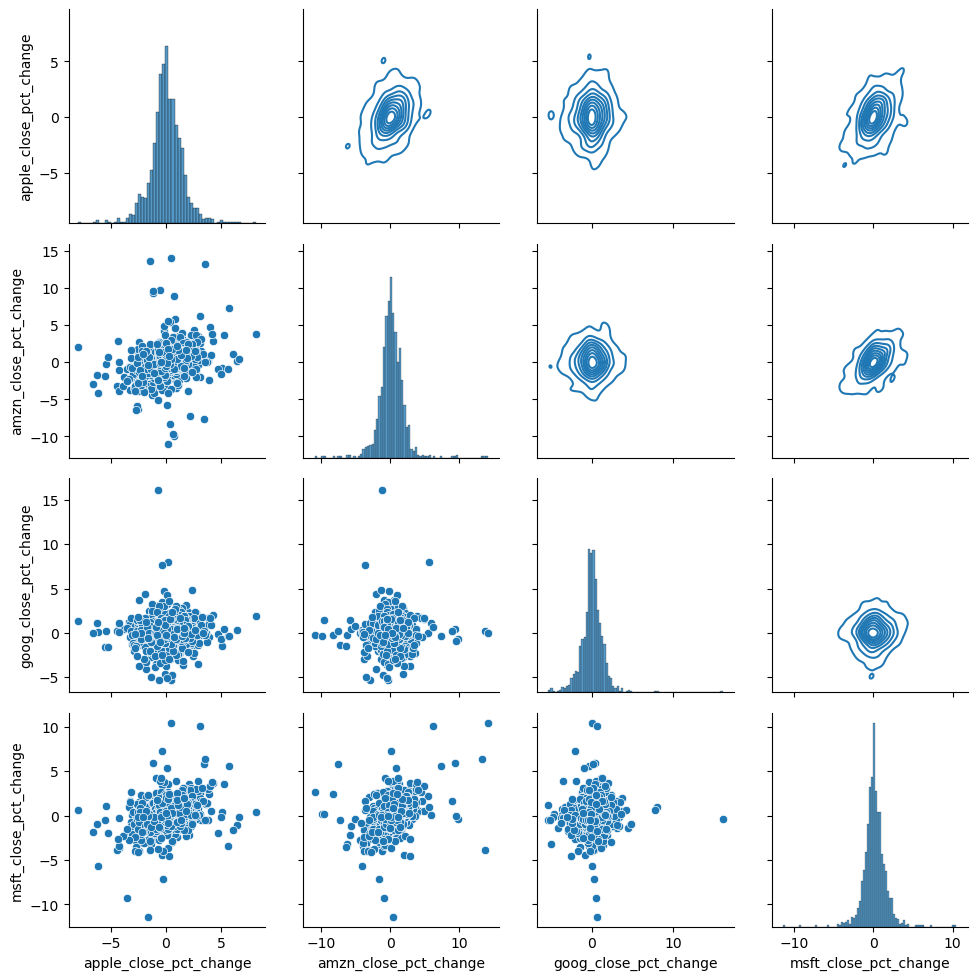

In [122]:
g = sns.PairGrid(data=closing_pct)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [123]:
closing_pct.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000


The correlation of msft and amazn is that if amazn drops 40%, then msft is likely to drop 40% as well.